In [1]:
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
!gdown --folder https://drive.google.com/drive/folders/1jxhppxwGwYvxgIua5HHZt9eVPL7S6bYv

Retrieving folder contents
Processing file 1_n_vDD3_Zhn33vIwOoBdqzHlAq-45LCS Mr_Wilson.jpg
Processing file 1e5HQQtVgFBFA-qXBUa2ZbfD6b3ntFEwO Tom-Hanks-in-Cast-Away.jpg
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1_n_vDD3_Zhn33vIwOoBdqzHlAq-45LCS
To: /content/W5/Mr_Wilson.jpg
100% 188k/188k [00:00<00:00, 77.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e5HQQtVgFBFA-qXBUa2ZbfD6b3ntFEwO
To: /content/W5/Tom-Hanks-in-Cast-Away.jpg
100% 392k/392k [00:00<00:00, 114MB/s]
Download completed


In [3]:
# source: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
def feature_matching(img1_path, img2_path, matcher_type='BF', ratio_threshold=0.9):
    img1 = cv2.imread(img1_path, cv2.IMREAD_COLOR)
    img2 = cv2.imread(img2_path, cv2.IMREAD_COLOR)

    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1_gray, None)
    kp2, des2 = sift.detectAndCompute(img2_gray, None)

    start_time = time.time()

    if matcher_type == 'BF':
        print("\n=== Using Brute-Force Matcher ===")
        bf = cv2.BFMatcher(cv2.NORM_L2)
        matches = bf.knnMatch(des1, des2, k=2)

    elif matcher_type == 'FLANN':
        print("\n=== Using FLANN Matcher ===")
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)

        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test
    good = []
    for m, n in matches:
        if m.distance < ratio_threshold * n.distance:
            good.append(m)

    match_time = time.time() - start_time

    print(f"Matching time: {match_time:.4f} seconds")
    print(f"Good matches found: {len(good)}")

    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return matched_img, match_time, len(good)

In [4]:
img1_path = 'W5/Mr_Wilson.jpg'
img2_path = 'W5/Tom-Hanks-in-Cast-Away.jpg'
ratio_threshold = 0.75

bf_result, bf_time, bf_matches = feature_matching(img1_path, img2_path, matcher_type='BF', ratio_threshold=ratio_threshold)

flann_result, flann_time, flann_matches = feature_matching(img1_path, img2_path, matcher_type='FLANN', ratio_threshold=ratio_threshold)


=== Using Brute-Force Matcher ===
Matching time: 0.8333 seconds
Good matches found: 16

=== Using FLANN Matcher ===
Matching time: 0.2338 seconds
Good matches found: 25


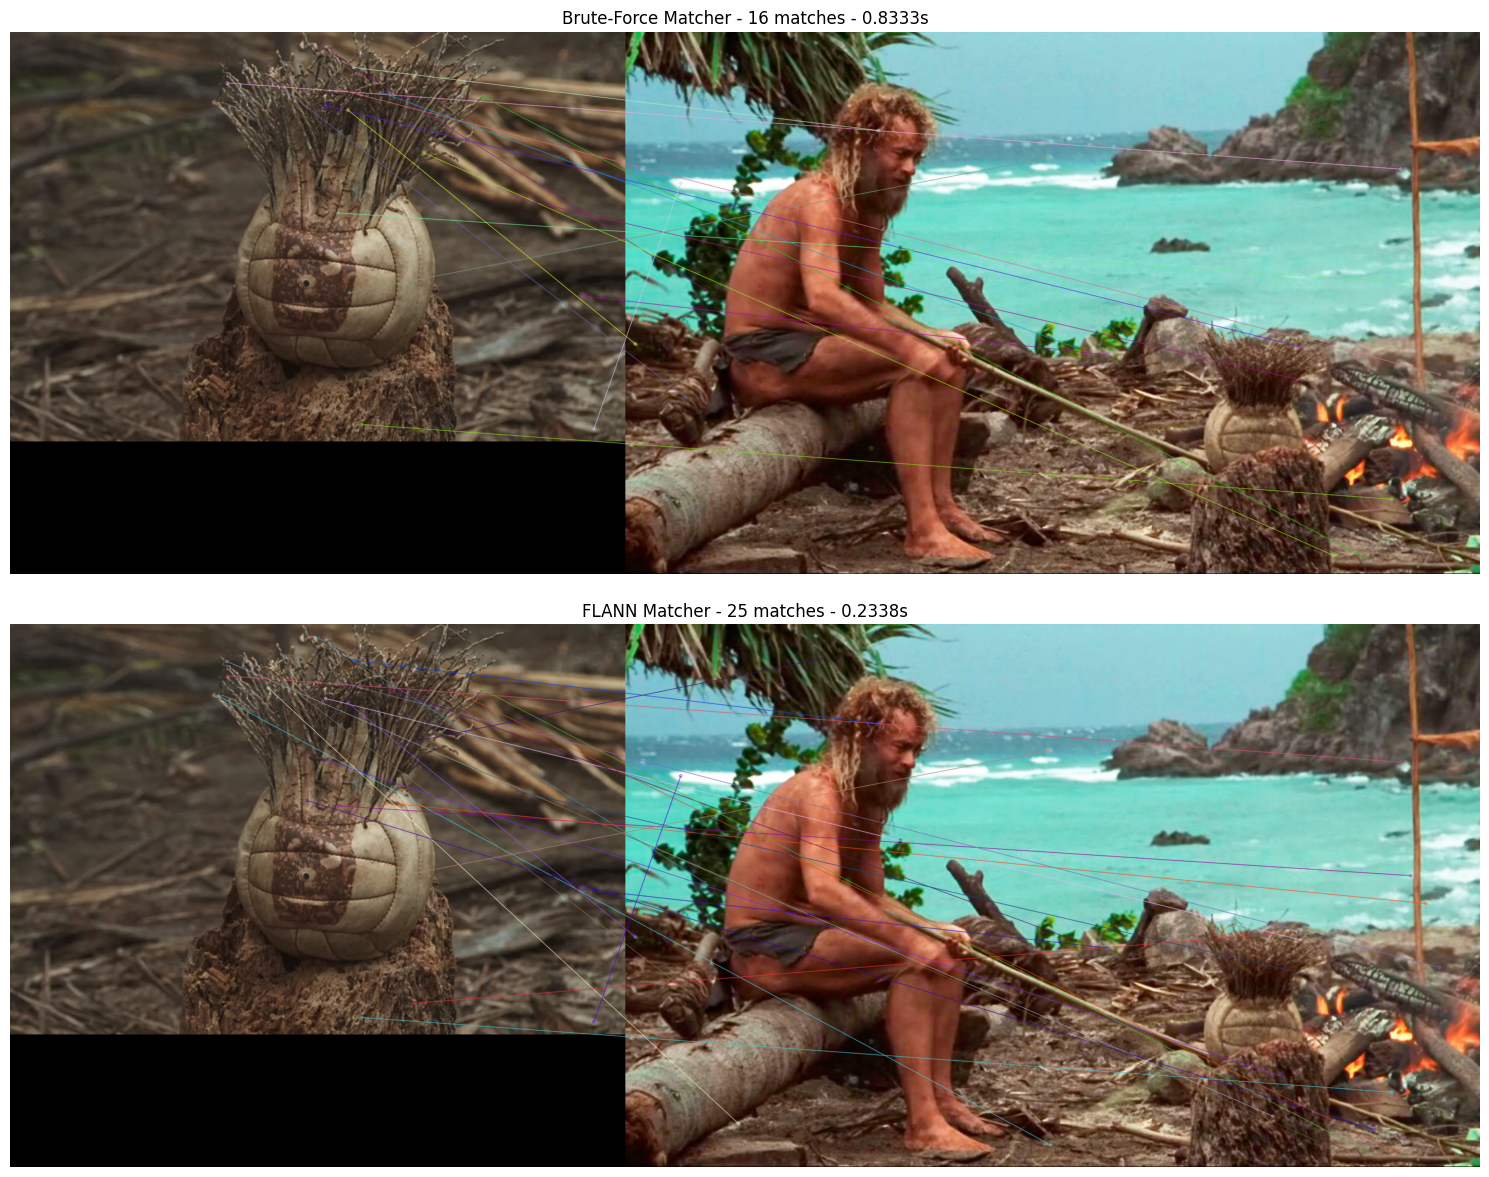

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

bf_rgb = cv2.cvtColor(bf_result, cv2.COLOR_BGR2RGB)
flann_rgb = cv2.cvtColor(flann_result, cv2.COLOR_BGR2RGB)

axes[0].imshow(bf_rgb)
axes[0].set_title(f'Brute-Force Matcher - {bf_matches} matches - {bf_time:.4f}s')
axes[0].axis('off')

axes[1].imshow(flann_rgb)
axes[1].set_title(f'FLANN Matcher - {flann_matches} matches - {flann_time:.4f}s')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('feature_matching_comparison.png', dpi=150, bbox_inches='tight')
plt.show()